# Data Description:
Amazon Reviews data ( data source ) The repository has several
datasets. For this case study, we are using the Electronics
dataset.

# Domain:
E-commerce

# Objective:
Online E-commerce websites like Amazon, Flipkart uses different recommendation models to provide different suggestions to different users. Amazon currently uses item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

In [1]:
###  Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import random
sns.set(rc={'figure.figsize':(13.7,8.27)}) # setting constant to increase seaborn graph sizes

In [2]:
### 2. Read the data as a data frame
origRatingDf = pd.read_csv('ratings_Electronics.csv')
origRatingDf.head(5)

,AKM1MP6P0OYPR,132793040,5,1
0,A2CX7LUOHB2NDG,321732944,5,NaN
1,A2NWSAGRHCP8N5,439886341,1,NaN
2,A2WNBOD3WNDNKT,439886341,3,NaN
3,A1GI0U4ZRJA8WN,439886341,1,NaN
4,A1QGNMC6O1VW39,511189877,5,NaN


# Attribute Information:
- ● userId : Every user identified with a unique id
- ● productId : Every product identified with a unique id
- ● Rating : Rating of the corresponding product by the corresponding user
- ● timestamp : Time of the rating ( ignore this columnfor this exercise)

In [3]:
# 1. Read and explore the given dataset. (Rename column/add headers, plot histograms, find data characteristics) - (2.5 Marks)
origRatingDf.columns = ['userid', 'productid', 'rating', 'timestamp']
del origRatingDf['timestamp']
origRatingDf.head(5)

,userid,productid,rating
0,A2CX7LUOHB2NDG,321732944,5
1,A2NWSAGRHCP8N5,439886341,1
2,A2WNBOD3WNDNKT,439886341,3
3,A1GI0U4ZRJA8WN,439886341,1
4,A1QGNMC6O1VW39,511189877,5


In [4]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print("Size of dataframe is " +color.BOLD+ format(origRatingDf.size) + color.END)
print("Shape(#rows,#columns) of dataframe is "+color.BOLD+ format(origRatingDf.shape) + color.END)
print("Dataframe information \n")
print(origRatingDf.info())

Size of dataframe is 3145725
Shape(#rows,#columns) of dataframe is (1048575, 3)
Dataframe information 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
userid       1048575 non-null object
productid    1048575 non-null object
rating       1048575 non-null int64
dtypes: int64(1), object(2)
memory usage: 24.0+ MB
None


In [5]:
#checking for missing values
origRatingDf.isnull().sum()

userid       0
productid    0
rating       0
dtype: int64

In [6]:
## Dataset has no missing values. 5 point summary of numerical attributes
origRatingDf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rating,1048575.0,3.973379,1.399329,1.0,3.0,5.0,5.0,5.0


In [7]:
print('possible rating values : ',origRatingDf['rating'].unique())
# rating value counts
origRatingDf['rating'].value_counts()

possible rating values :  [5 1 3 2 4]


5    565636
4    208535
1    128251
3     83509
2     62644
Name: rating, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020253A80EB8>]],
      dtype=object)

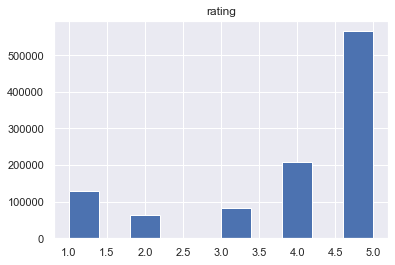

In [8]:
origRatingDf.hist()

In [9]:
#we can see that we have more ratings count for high ratings such as 4 and 5 
#2. Take a subset of the dataset to make it less sparse/ denser.( For example, keep the users only who has given 50 or more number of ratings ) - (2.5 Marks)
filteredRatingdf = origRatingDf.groupby('userid').filter(lambda x: len(x) >= 50)
filteredRatingdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3456 entries, 2161 to 1048157
Data columns (total 3 columns):
userid       3456 non-null object
productid    3456 non-null object
rating       3456 non-null int64
dtypes: int64(1), object(2)
memory usage: 108.0+ KB


In [10]:
filteredRatingdf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rating,3456.0,4.222801,1.137754,1.0,4.0,5.0,5.0,5.0


In [11]:
# Users found with more than 50 ratings
filteredRatingdf.groupby('userid')['rating'].count().sort_values(ascending=False)

userid
A5JLAU2ARJ0BO     412
A231WM2Z2JL0U3    249
A25HBO5V8S8SEA    164
A6FIAB28IS79      146
AT6CZDCP4TRGA     128
AKT8TGIT6VVZ5     122
A11D1KHM7DVOQK    112
A2B7BUH8834Y6M    103
A3OXHLG6DIBRW8     95
A203OCQQ12MAVT     90
A2R6RA8FRBS608     88
A2AEZQ3DGBBLPR     85
A680RUE1FDO8B      78
A1F9Z42CFF9IAY     76
AGHZXQL9F94T9      75
A1FR68QH6Z4YZM     75
A1MJMYLRTZ76ZX     74
A1JWSDDIH5Z7DV     72
A7Y6AVS576M03      70
A1435P5AMCPB3X     69
A149RNR5RH19YY     68
A12DLJESJKM1OQ     65
ABH9D1TEOJ56E      64
AWPODHOB4GFWL      64
A2CL818RN52NWN     64
A1RPTVW5VEOSI      63
A2AY4YUOX2N1BQ     63
A2XRMQA6PJ5ZJ8     63
A38QEATH3NODFM     61
A1ODOGXEYECQQ8     60
AGXV8E7XK9J6H      59
AT2J7H5TRZM8Z      57
A1VQHH85U7PX0      57
A2BGZ52M908MJY     54
A15QYHQH80W30L     54
A3NCIN6TNL0MGA     54
ALUNVOQRXOZIA      53
A250AXLRBVYKB4     50
Name: rating, dtype: int64

In [12]:
# Popularity based reccomendation 
#finding highest mean rated products
filteredRatingdf.groupby('productid')['rating'].mean().sort_values(ascending=False).head()

productid
B0001FV3AK    5.0
B00009XW3F    5.0
B0000AOWWM    5.0
B00004ZCDD    5.0
B0000AQFZ9    5.0
Name: rating, dtype: float64

In [13]:
#find products which received most number of ratings
filteredRatingdf.groupby('productid')['rating'].count().sort_values(ascending=False).head()

productid
B00004SB92    7
B00004ZCJE    5
B00008OE6I    5
B00005LEN4    5
B00007KDVI    5
Name: rating, dtype: int64

In [14]:
#prepare dataframe having mean and rating count for each product
ratings_mean_count = pd.DataFrame(filteredRatingdf.groupby('productid')['rating'].mean())
ratings_mean_count['rating_counts'] = pd.DataFrame(filteredRatingdf.groupby('productid')['rating'].count())

#caclculating score of each product by multiplying rating and count of ratings received
score = ratings_mean_count.rating * ratings_mean_count.rating_counts
ratings_mean_count['score'] = score
# finding top 5 highest products with higest score
popularity_recommendations =ratings_mean_count.sort_values(['score'],ascending=False).head()
popularity_recommendations

,rating,rating_counts,score
productid,,,
B00004SB92,4.0,7,28.0
B00005LEN4,4.8,5,24.0
B00008OE6I,4.6,5,23.0
B00004ZCJE,4.6,5,23.0
B000BKJZ9Q,4.2,5,21.0


In [15]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['userId'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

In [16]:
#using our popularity model to return recommendation to users
find_recom = ['A2AEZQ3DGBBLPR','A6FIAB28IS79','AT6CZDCP4TRGA']   # This list is user choice.
for i in find_recom:
    print("The list of recommendations for the userId ",i)
    print(recommend(i))    
    print("\n")

The list of recommendations for the userId  A2AEZQ3DGBBLPR
                    userId  rating  rating_counts  score
productid                                               
B00004SB92  A2AEZQ3DGBBLPR     4.0              7   28.0
B00005LEN4  A2AEZQ3DGBBLPR     4.8              5   24.0
B00008OE6I  A2AEZQ3DGBBLPR     4.6              5   23.0
B00004ZCJE  A2AEZQ3DGBBLPR     4.6              5   23.0
B000BKJZ9Q  A2AEZQ3DGBBLPR     4.2              5   21.0


The list of recommendations for the userId  A6FIAB28IS79
                  userId  rating  rating_counts  score
productid                                             
B00004SB92  A6FIAB28IS79     4.0              7   28.0
B00005LEN4  A6FIAB28IS79     4.8              5   24.0
B00008OE6I  A6FIAB28IS79     4.6              5   23.0
B00004ZCJE  A6FIAB28IS79     4.6              5   23.0
B000BKJZ9Q  A6FIAB28IS79     4.2              5   21.0


The list of recommendations for the userId  AT6CZDCP4TRGA
                   userId  rating  rat

In [17]:
#As we can above see All users get same recommendation as per popularity model.

In [18]:
#5. Build Collaborative Filtering model.
#converting the dataframe to format supported by surprise package
from surprise import Reader, Dataset
reader = Reader()
data = Dataset.load_from_df(filteredRatingdf[['userid', 'productid', 'rating']], reader = reader)

In [19]:
#instead of 70:30 split lets use 3 fold cross validation to choose our model first
#k-NN Based Algorithms
from surprise import KNNBasic, KNNWithMeans, KNNWithZScore
from surprise.model_selection import cross_validate
knnbasic_cv = cross_validate(KNNBasic(), data, cv=3, n_jobs=5, verbose=False)
knnmeans_cv = cross_validate(KNNWithMeans(), data, cv=3, n_jobs=5, verbose=False)
knnz_cv = cross_validate(KNNWithZScore(), data, cv=3, n_jobs=5, verbose=False)

In [20]:
#Matrix Factorization Based Algorithms
from surprise import SVD, SVDpp, NMF
svd_cv = cross_validate(SVD(), data, cv=3, n_jobs=5, verbose=False)
svdpp_cv = cross_validate(SVDpp(), data, cv=3, n_jobs=5, verbose=False)
nmf_cv = cross_validate(NMF(), data, cv=3, n_jobs=5, verbose=False)

In [21]:
#Other Collaborative Filtering Algorithms
from surprise import SlopeOne, CoClustering
slope_cv = cross_validate(SlopeOne(), data, cv=3, n_jobs=5, verbose=False)
coclus_cv = cross_validate(CoClustering(), data, cv=3, n_jobs=5, verbose=False)

In [22]:
#Comparison of all algorithms on RMSE and MAE
print('Algorithm\t RMSE\t\t MAE')
print()
print('KNN Basic', '\t', round(knnbasic_cv['test_rmse'].mean(), 4), '\t', round(knnbasic_cv['test_mae'].mean(), 4))
print('KNN Means', '\t', round(knnmeans_cv['test_rmse'].mean(), 4), '\t', round(knnmeans_cv['test_mae'].mean(), 4))
print('KNN ZScore', '\t', round(knnz_cv['test_rmse'].mean(), 4), '\t', round(knnz_cv['test_mae'].mean(), 4))
print()
print('SVD', '\t\t', round(svd_cv['test_rmse'].mean(), 4), '\t', round(svd_cv['test_mae'].mean(), 4))
print('SVDpp', '\t\t', round(svdpp_cv['test_rmse'].mean(), 4), '\t', round(svdpp_cv['test_mae'].mean(), 4))
print('NMF', '\t\t', round(nmf_cv['test_rmse'].mean(), 4), '\t', round(nmf_cv['test_mae'].mean(), 4))
print()
print('SlopeOne', '\t', round(slope_cv['test_rmse'].mean(), 4), '\t', round(slope_cv['test_mae'].mean(), 4))
print('CoClustering', '\t', round(coclus_cv['test_rmse'].mean(), 4), '\t', round(coclus_cv['test_mae'].mean(), 4))
print()

Algorithm	 RMSE		 MAE

KNN Basic 	 1.1872 	 0.9105
KNN Means 	 1.1557 	 0.8912
KNN ZScore 	 1.1617 	 0.8921

SVD 		 1.0544 	 0.798
SVDpp 		 1.0625 	 0.8013
NMF 		 1.2124 	 0.9533

SlopeOne 	 1.1581 	 0.8963
CoClustering 	 1.1791 	 0.9035



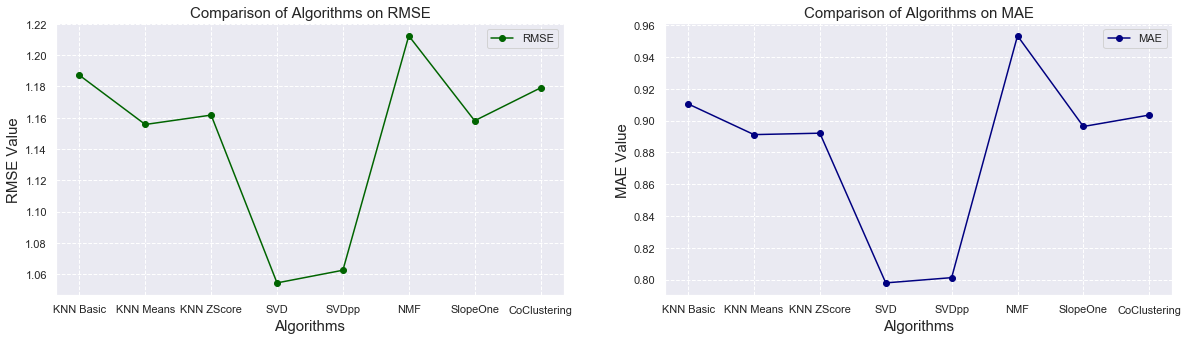

In [23]:
x_algo = ['KNN Basic', 'KNN Means', 'KNN ZScore', 'SVD', 'SVDpp', 'NMF', 'SlopeOne', 'CoClustering']
all_algos_cv = [knnbasic_cv, knnmeans_cv, knnz_cv, svd_cv, svdpp_cv, nmf_cv, slope_cv, coclus_cv]

rmse_cv = [round(res['test_rmse'].mean(), 4) for res in all_algos_cv]
mae_cv = [round(res['test_mae'].mean(), 4) for res in all_algos_cv]

plt.figure(figsize=(20,5))

plt.subplot(1, 2, 1)
plt.title('Comparison of Algorithms on RMSE', loc='center', fontsize=15)
plt.plot(x_algo, rmse_cv, label='RMSE', color='darkgreen', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.subplot(1, 2, 2)
plt.title('Comparison of Algorithms on MAE', loc='center', fontsize=15)
plt.plot(x_algo, mae_cv, label='MAE', color='navy', marker='o')
plt.xlabel('Algorithms', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dashed')

plt.show()

In [24]:
#Evaluation Results show that SVD is best model as per RMSE and MAE svdpp is 2nd one, knnmeans is 3rd
#Let's performa parameter search on SVD,SVDpp
# Parameter space
from surprise.model_selection import GridSearchCV
svd_param_grid = {'n_epochs': [20, 25], 
                  'lr_all': [0.007, 0.009, 0.01],
                  'reg_all': [0.4, 0.6]}

svd_gs = GridSearchCV(SVD, svd_param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
svd_gs.fit(data)

In [25]:
print('SVD   - RMSE:', round(svd_gs.best_score['rmse'], 4), '; MAE:', round(svd_gs.best_score['mae'], 4))

SVD   - RMSE: 1.0584 ; MAE: 0.8122


In [26]:
#best params SVD
print('RMSE =', svd_gs.best_params['rmse'])
print('MAE =', svd_gs.best_params['mae'])

RMSE = {'n_epochs': 20, 'lr_all': 0.007, 'reg_all': 0.4}
MAE = {'n_epochs': 20, 'lr_all': 0.007, 'reg_all': 0.4}


In [27]:
#grid search for KNNWithMeans
param_grid = {'k': [15, 20, 25, 30, 40, 50, 60]}
knnmean_gs = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
knnmean_gs.fit(data)

In [28]:
x = [15, 20, 25, 30, 40, 50, 60]
y5 = knnmean_gs.cv_results['mean_test_rmse']
y6 = knnmean_gs.cv_results['mean_test_mae']

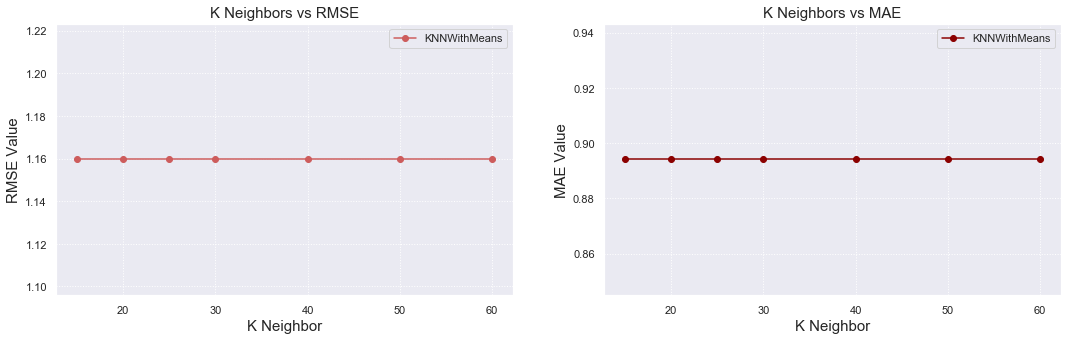

In [29]:
plt.figure(figsize=(18,5))

plt.subplot(1, 2, 1)
plt.title('K Neighbors vs RMSE', loc='center', fontsize=15)
plt.plot(x, y5, label='KNNWithMeans', color='indianred', marker='o')
plt.xlabel('K Neighbor', fontsize=15)
plt.ylabel('RMSE Value', fontsize=15)
plt.legend()
plt.grid(ls='dotted')

plt.subplot(1, 2, 2)
plt.title('K Neighbors vs MAE', loc='center', fontsize=15)
plt.plot(x, y6, label='KNNWithMeans', color='darkred', marker='o')
plt.xlabel('K Neighbor', fontsize=15)
plt.ylabel('MAE Value', fontsize=15)
plt.legend()
plt.grid(ls='dotted')

plt.show()

In [30]:
#No real diffeence in RMSE and MAE for diffnerent values of k neighbours

In [31]:
# We can now use the best parameters that should return the best rmse and build prediction
from surprise import SVD
from surprise import Dataset
from surprise import accuracy

algo = SVD(n_epochs=20, lr_all=0.009, reg_all=0.4)

# shuffle ratings if you want                                              
random.shuffle(data.raw_ratings)                                                
raw_ratings = data.raw_ratings                                                                           
# 70% trainset, 30% testset                                                
threshold = int(.7 * len(raw_ratings))                                     
trainset_raw_ratings = raw_ratings[:threshold]                             
test_raw_ratings = raw_ratings[threshold:]                                 
                                                                           
data.raw_ratings = trainset_raw_ratings  # data is now your trainset       
                                                                           
# retrain on the whole train set                                           
trainset = data.build_full_trainset()                                      
algo.fit(trainset)                                                       
                                                                           
#now test on the trainset                                                 
testset = data.construct_testset(trainset_raw_ratings)                     
predictions = algo.test(testset)                                           
print('Accuracy on the trainset:')                                         
accuracy.rmse(predictions)                                                 
                                                                          
# now test on the testset                                                  
testset = data.construct_testset(test_raw_ratings)                         
predictions = algo.test(testset)                                           
print('Accuracy on the testset:')                                          
accuracy.rmse(predictions)  

Accuracy on the trainset:
RMSE: 0.8257
Accuracy on the testset:
RMSE: 1.0955


1.0954917685476686

In [33]:
# #7. Get top - K ( K = 5) recommendations. Since our goal is to recommend new products for each user based on his/her #habits, we will recommend 5 new products. - (7.5 Marks)
# recDf = popularity_model.recommend_items(user_id='A250AXLRBVYKB4')   

from collections import defaultdict
def get_top_n(predictions, n=5):
    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [34]:
#Top 5 recommendations per user
top_n = get_top_n(predictions, n=5)
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

A3NCIN6TNL0MGA ['B0006HU49E', 'B000HOJN3O', 'B0000952XU', 'B00009ZY5C', 'B000EPLP3C']
A1JWSDDIH5Z7DV ['B0007OW51Q', 'B000GHDPHC', 'B0000631YV', 'B00067AXYU', 'B0006PK8IS']
ABH9D1TEOJ56E ['B00008OE6I', 'B00008RHA3', 'B000067VKY', 'B0000D8DM7', 'B000087LII']
AT2J7H5TRZM8Z ['B00005QFZG', 'B00005V619', 'B00004VWM3', 'B00006412G', 'B000031KIM']
AKT8TGIT6VVZ5 ['B00005LEN4', 'B000021YU8', 'B00014M3XW', 'B00006I53X', 'B00006I5E1']
A203OCQQ12MAVT ['B0008D76L0', 'B00008VSL7', 'B0002GRUJ6', 'B000B7PKKW', 'B0000511T7']
A5JLAU2ARJ0BO ['B00007H4LM', 'B00004SB92', 'B00006L9CT', 'B00004VX3T', 'B0001G6U5M']
A15QYHQH80W30L ['B000BY52NK', 'B00009R8I4', 'B00009R89C', 'B00009R88X', 'B000BH5OW6']
A6FIAB28IS79 ['B00005T408', 'B000EOPQ7E', 'B000FQ2JLW', 'B0002L5R78', 'B00005LB8P']
A2CL818RN52NWN ['B0008G1RWQ', 'B00018XFAI', 'B000083CUA', 'B00068IKXK', 'B00018XFCQ']
A2B7BUH8834Y6M ['B00004SB92', 'B0000899ZA', 'B000GJF76W', 'B0001WW3F2', 'B0000296HA']
A11D1KHM7DVOQK ['B0006HTPQ2', 'B0001MKU52', 'B0001FV35U', 'B

In [35]:
#8. Summarise your insights. - (7.5 marks)

- The Popularity-based recommender system is a non-personalised recommender system and these are based on frequecy counts, which may be not suitable to the user. The Popularity based model has recommended the same set of 5 products to both but Collaborative Filtering based model has recommended entire different list based on the user past purchase history. However popularity based system is good way to start recommendation system when we do not have user choices , item characteristics available with us

- Model-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user.

- Matrix based SVD system has givem model with least RMSE. 